In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
#Avisos
import warnings
warnings.filterwarnings('ignore')

In [145]:
df = pd.read_csv("/content/Dados Históricos - Ibovespa_4anos.csv", sep=",")
df.head(25)

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,18.08.2023,115.409,114.973,115.729,114.423,"10,60M","0,37%"
1,17.08.2023,114.982,115.592,116.610,114.859,"12,75M","-0,53%"
2,16.08.2023,115.592,116.171,117.338,115.534,"18,86M","-0,50%"
3,15.08.2023,116.171,116.809,117.697,116.033,"14,64M","-0,55%"
4,14.08.2023,116.810,118.067,118.082,116.530,"11,20M","-1,06%"
5,11.08.2023,118.065,118.350,119.054,117.415,"11,87M","-0,24%"
6,10.08.2023,118.350,118.412,119.438,118.113,"12,69M","-0,05%"
7,09.08.2023,118.409,119.090,119.090,117.901,"11,25M","-0,57%"
8,08.08.2023,119.090,119.378,119.553,117.492,"10,25M","-0,24%"
9,07.08.2023,119.380,119.509,120.104,118.894,"8,73M","-0,11%"


In [146]:
from datetime import datetime
def converterData(data):
  return datetime.strptime(data,'%d.%m.%Y')

In [147]:
df.head(25)

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,18.08.2023,115.409,114.973,115.729,114.423,"10,60M","0,37%"
1,17.08.2023,114.982,115.592,116.610,114.859,"12,75M","-0,53%"
2,16.08.2023,115.592,116.171,117.338,115.534,"18,86M","-0,50%"
3,15.08.2023,116.171,116.809,117.697,116.033,"14,64M","-0,55%"
4,14.08.2023,116.810,118.067,118.082,116.530,"11,20M","-1,06%"
5,11.08.2023,118.065,118.350,119.054,117.415,"11,87M","-0,24%"
6,10.08.2023,118.350,118.412,119.438,118.113,"12,69M","-0,05%"
7,09.08.2023,118.409,119.090,119.090,117.901,"11,25M","-0,57%"
8,08.08.2023,119.090,119.378,119.553,117.492,"10,25M","-0,24%"
9,07.08.2023,119.380,119.509,120.104,118.894,"8,73M","-0,11%"


In [148]:
df['Data'] = df['Data'].apply(converterData)

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1153 entries, 0 to 1152
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Data      1153 non-null   datetime64[ns]
 1   Último    1153 non-null   float64       
 2   Abertura  1153 non-null   float64       
 3   Máxima    1153 non-null   float64       
 4   Mínima    1153 non-null   float64       
 5   Vol.      1153 non-null   object        
 6   Var%      1153 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 63.2+ KB


In [150]:
df.head(25)

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,2023-08-18,115.409,114.973,115.729,114.423,"10,60M","0,37%"
1,2023-08-17,114.982,115.592,116.610,114.859,"12,75M","-0,53%"
2,2023-08-16,115.592,116.171,117.338,115.534,"18,86M","-0,50%"
3,2023-08-15,116.171,116.809,117.697,116.033,"14,64M","-0,55%"
4,2023-08-14,116.810,118.067,118.082,116.530,"11,20M","-1,06%"
5,2023-08-11,118.065,118.350,119.054,117.415,"11,87M","-0,24%"
6,2023-08-10,118.350,118.412,119.438,118.113,"12,69M","-0,05%"
7,2023-08-09,118.409,119.090,119.090,117.901,"11,25M","-0,57%"
8,2023-08-08,119.090,119.378,119.553,117.492,"10,25M","-0,24%"
9,2023-08-07,119.380,119.509,120.104,118.894,"8,73M","-0,11%"


In [151]:
df = df.rename(columns={"Vol.":"Vol", "Var%":"Var", "Mínima": "Minima", "Máxima": "Maxima", "Último":"Fechamento"})

In [152]:
def convert_to_float(value):
    if "M" in value:
        return float(value.replace("M", "").replace(",", ".")) * 1000000
    elif "K" in value:
        return float(value.replace("K", "").replace(",", ".")) * 1000
    else:
        return float(value.replace(",", "."))

df["Vol"] = df["Vol"].apply(convert_to_float)

print(df)

           Data  Fechamento  Abertura   Maxima   Minima         Vol     Var
0    2023-08-18     115.409   114.973  115.729  114.423  10600000.0   0,37%
1    2023-08-17     114.982   115.592  116.610  114.859  12750000.0  -0,53%
2    2023-08-16     115.592   116.171  117.338  115.534  18860000.0  -0,50%
3    2023-08-15     116.171   116.809  117.697  116.033  14640000.0  -0,55%
4    2023-08-14     116.810   118.067  118.082  116.530  11200000.0  -1,06%
...         ...         ...       ...      ...      ...         ...     ...
1148 2019-01-08      92.032    91.699   92.231   91.064   4640000.0   0,36%
1149 2019-01-07      91.699    91.845   92.552   91.288   4710000.0  -0,15%
1150 2019-01-04      91.841    91.577   92.701   90.824   5490000.0   0,30%
1151 2019-01-03      91.564    91.011   91.596   89.922   6250000.0   0,61%
1152 2019-01-02      91.012    87.887   91.479   87.536   5790000.0   3,56%

[1153 rows x 7 columns]


In [153]:
def convert_to_floats(value):
    return float(value.replace("%", "").replace(",", "."))

df["Var"] = df["Var"].apply(convert_to_floats)

print(df)

           Data  Fechamento  Abertura   Maxima   Minima         Vol   Var
0    2023-08-18     115.409   114.973  115.729  114.423  10600000.0  0.37
1    2023-08-17     114.982   115.592  116.610  114.859  12750000.0 -0.53
2    2023-08-16     115.592   116.171  117.338  115.534  18860000.0 -0.50
3    2023-08-15     116.171   116.809  117.697  116.033  14640000.0 -0.55
4    2023-08-14     116.810   118.067  118.082  116.530  11200000.0 -1.06
...         ...         ...       ...      ...      ...         ...   ...
1148 2019-01-08      92.032    91.699   92.231   91.064   4640000.0  0.36
1149 2019-01-07      91.699    91.845   92.552   91.288   4710000.0 -0.15
1150 2019-01-04      91.841    91.577   92.701   90.824   5490000.0  0.30
1151 2019-01-03      91.564    91.011   91.596   89.922   6250000.0  0.61
1152 2019-01-02      91.012    87.887   91.479   87.536   5790000.0  3.56

[1153 rows x 7 columns]


In [154]:
df.describe()

,Fechamento,Abertura,Maxima,Minima,Vol,Var
count,1153.000000,1153.000000,1153.000000,1153.000000,1.153000e+03,1153.000000
mean,107.048034,107.024967,108.057820,105.992696,9.829215e+06,0.038309
std,10.954091,10.965904,10.771892,11.106725,3.823877e+06,1.705088
min,63.570000,63.604000,67.604000,61.691000,4.243200e+05,-14.780000
25%,100.553000,100.553000,101.560000,99.630000,6.800000e+06,-0.760000
50%,107.629000,107.582000,108.602000,106.624000,9.990000e+06,0.070000
75%,115.121000,115.093000,115.863000,113.945000,1.232000e+07,0.930000
max,130.776000,130.776000,131.190000,129.526000,2.603000e+07,13.910000


In [155]:
df = df.sort_values(by='Data')

In [156]:
df.head()

,Data,Fechamento,Abertura,Maxima,Minima,Vol,Var
1152,2019-01-02,91.012,87.887,91.479,87.536,5790000.0,3.56
1151,2019-01-03,91.564,91.011,91.596,89.922,6250000.0,0.61
1150,2019-01-04,91.841,91.577,92.701,90.824,5490000.0,0.30
1149,2019-01-07,91.699,91.845,92.552,91.288,4710000.0,-0.15
1148,2019-01-08,92.032,91.699,92.231,91.064,4640000.0,0.36


In [157]:
df.set_index('Data', inplace=True)

In [158]:
df.head()

,Fechamento,Abertura,Maxima,Minima,Vol,Var
Data,,,,,,
2019-01-02,91.012,87.887,91.479,87.536,5790000.0,3.56
2019-01-03,91.564,91.011,91.596,89.922,6250000.0,0.61
2019-01-04,91.841,91.577,92.701,90.824,5490000.0,0.30
2019-01-07,91.699,91.845,92.552,91.288,4710000.0,-0.15
2019-01-08,92.032,91.699,92.231,91.064,4640000.0,0.36


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1153 entries, 2019-01-02 to 2023-08-18
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Fechamento  1153 non-null   float64
 1   Abertura    1153 non-null   float64
 2   Maxima      1153 non-null   float64
 3   Minima      1153 non-null   float64
 4   Vol         1153 non-null   float64
 5   Var         1153 non-null   float64
dtypes: float64(6)
memory usage: 63.1 KB


In [160]:
df.isnull().sum()

Fechamento    0
Abertura      0
Maxima        0
Minima        0
Vol           0
Var           0
dtype: int64

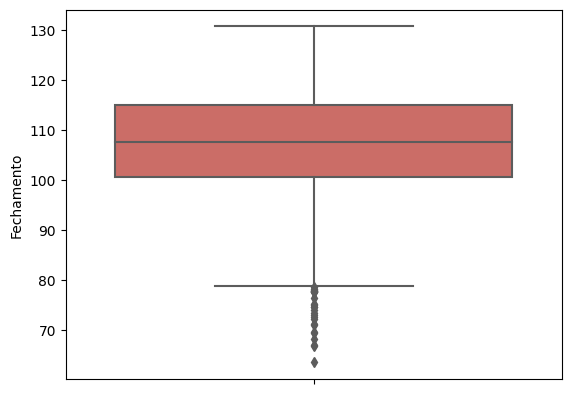

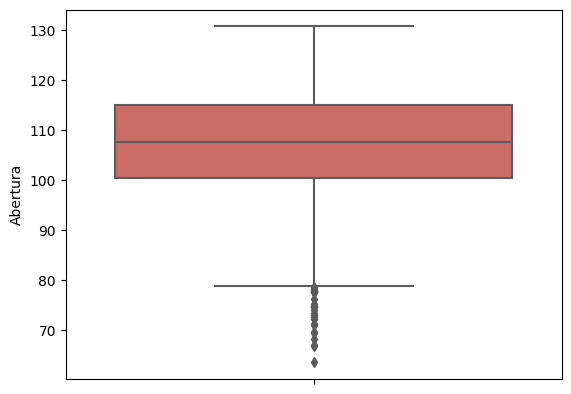

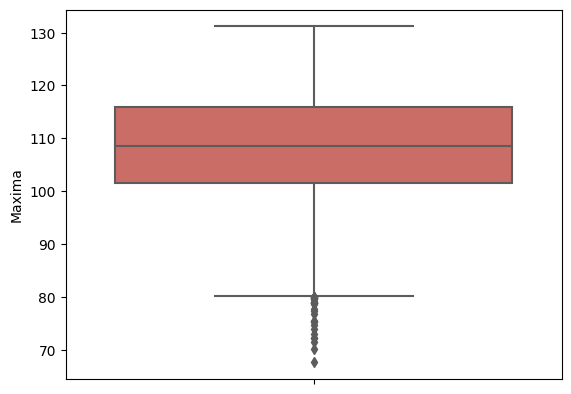

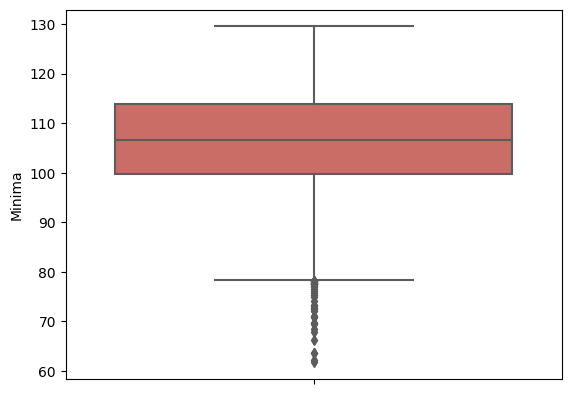

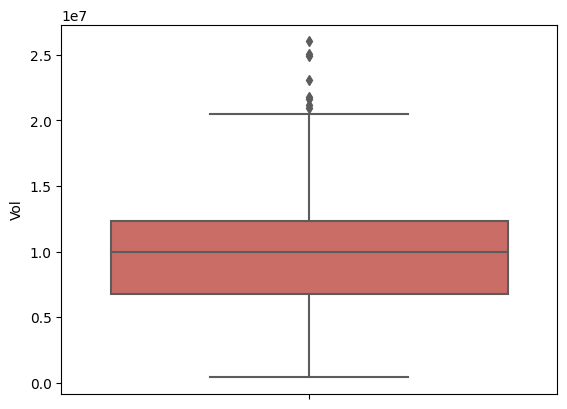

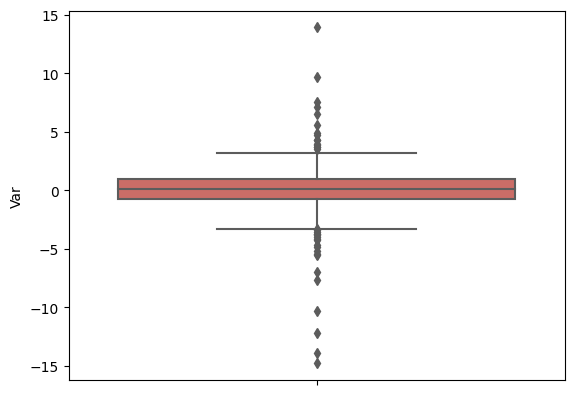

In [161]:
sns.boxplot(y="Fechamento", data=df, palette="hls")
plt.show()
sns.boxplot(y="Abertura", data=df, palette="hls")
plt.show()
sns.boxplot(y="Maxima", data=df, palette="hls")
plt.show()
sns.boxplot(y="Minima", data=df, palette="hls")
plt.show()
sns.boxplot(y="Vol", data=df, palette="hls")
plt.show()
sns.boxplot(y="Var", data=df, palette="hls")
plt.show()

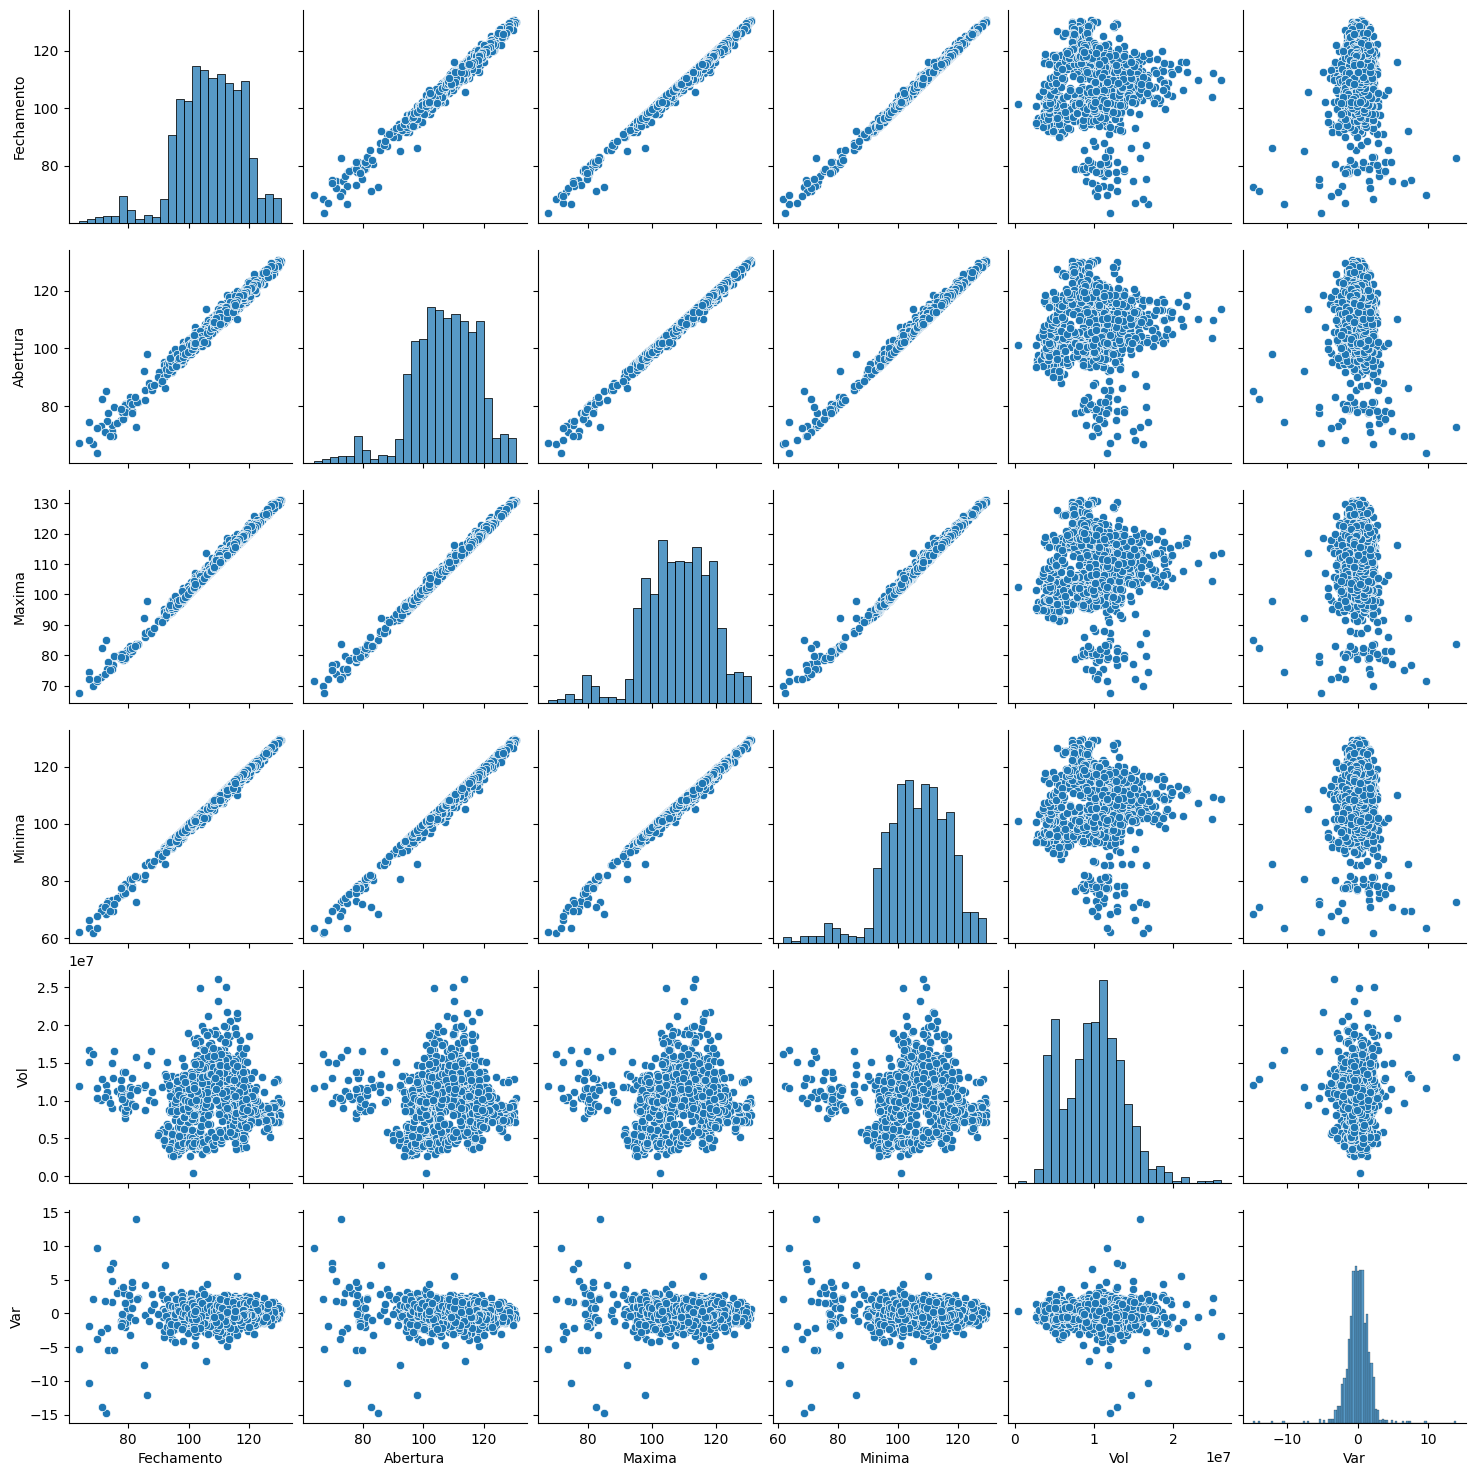

In [162]:
sns.pairplot(df, vars=['Fechamento','Abertura','Maxima','Minima','Vol', "Var"])

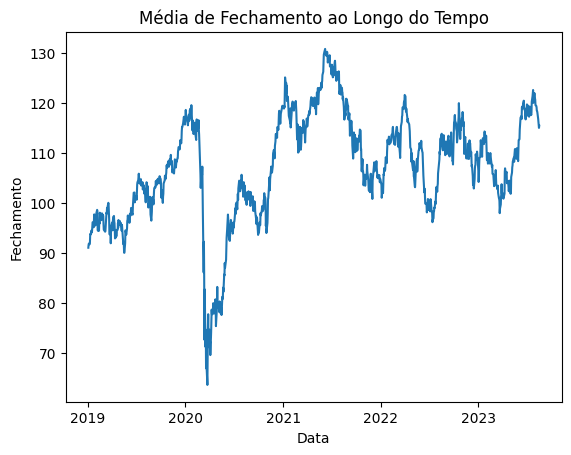

In [163]:
plt.plot(df.index, df["Fechamento"])
plt.xlabel("Data")
plt.ylabel("Fechamento")
plt.title("Média de Fechamento ao Longo do Tempo")
plt.show()

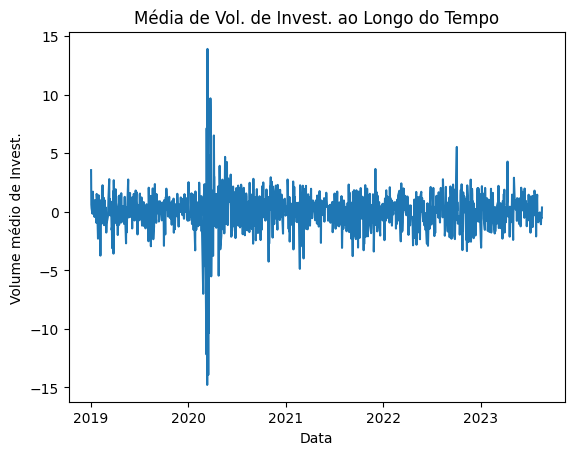

In [164]:
plt.plot(df.index, df["Var"])
plt.xlabel("Data")
plt.ylabel("Volume médio de Invest.")
plt.title("Média de Vol. de Invest. ao Longo do Tempo")
plt.show()

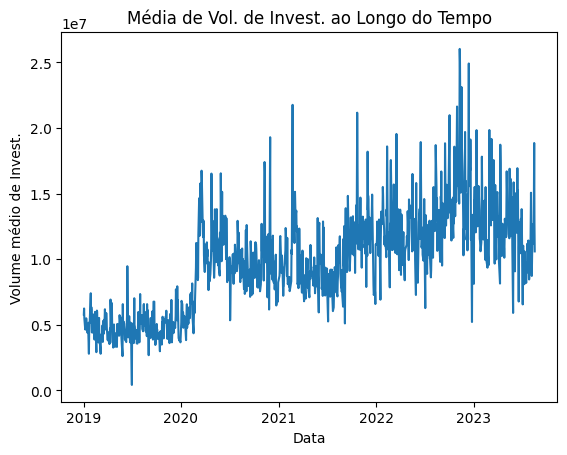

In [165]:
plt.plot(df.index, df["Vol"])
plt.xlabel("Data")
plt.ylabel("Volume médio de Invest.")
plt.title("Média de Vol. de Invest. ao Longo do Tempo")
plt.show()

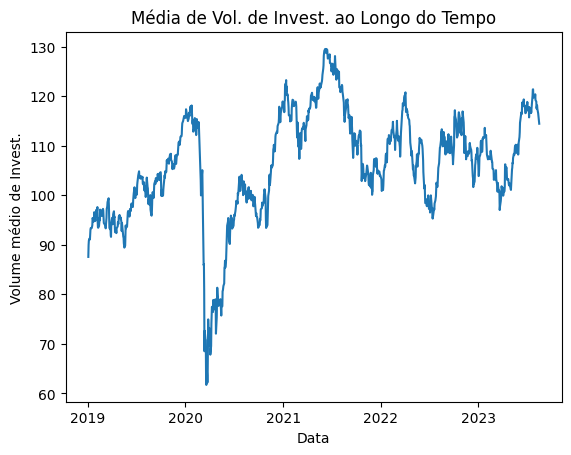

In [166]:
plt.plot(df.index, df["Minima"])
plt.xlabel("Data")
plt.ylabel("Volume médio de Invest.")
plt.title("Média de Vol. de Invest. ao Longo do Tempo")
plt.show()

<Axes: >

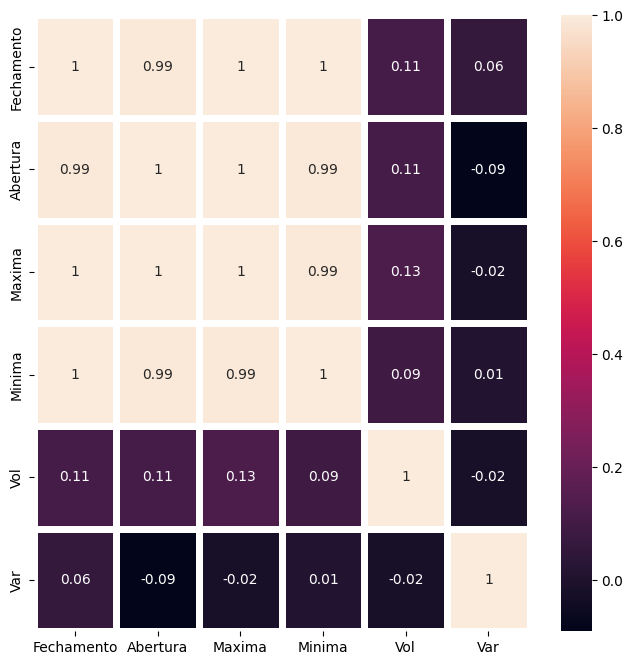

In [167]:
correlation_matriz = df.corr().round(2)

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(data = correlation_matriz, annot=True, linewidths=5, ax=ax)

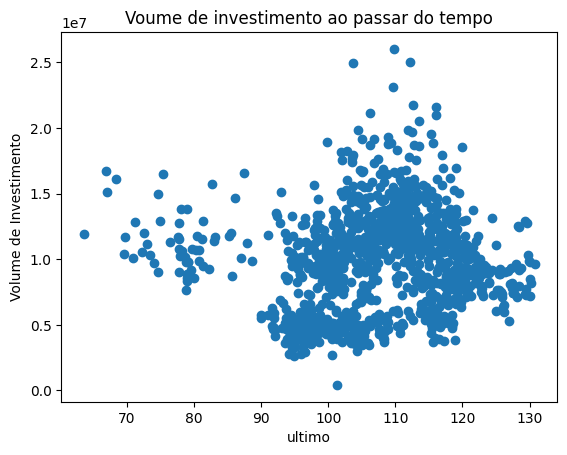

In [168]:
plt.scatter(df["Fechamento"], df["Vol"])
plt.xlabel("ultimo")
plt.ylabel("Volume de Investimento")
plt.title("Voume de investimento ao passar do tempo")
plt.show()

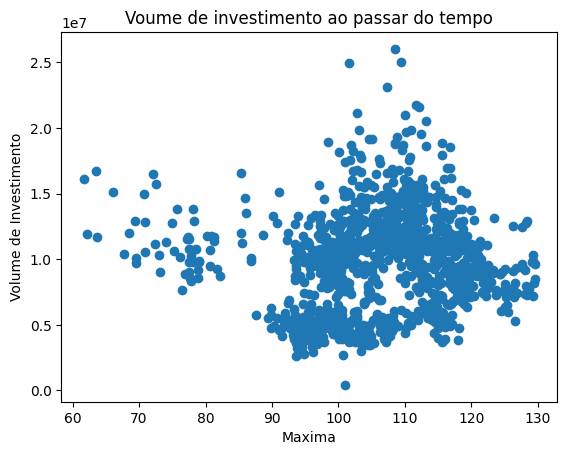

In [169]:
plt.scatter(df["Minima"], df["Vol"])
plt.xlabel("Maxima")
plt.ylabel("Volume de Investimento")
plt.title("Voume de investimento ao passar do tempo")
plt.show()

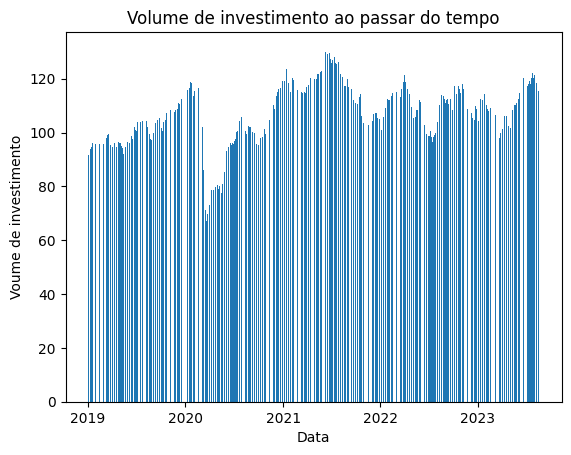

In [170]:
plt.bar(df.index, df["Fechamento"])
plt.xlabel("Data")
plt.ylabel("Voume de investimento")
plt.title("Volume de investimento ao passar do tempo")
plt.show()

In [171]:
print("Data Inicial:", df.index.min())

Data Inicial: 2019-01-02 00:00:00


In [172]:
print("Data Final:", df.index.max())

Data Final: 2023-08-18 00:00:00


In [173]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf

#*Tendência - Direção
#*Sazonalidade - Recorrência das oscilações
#*Resíduo - O que sobra do sinal

In [174]:
dec_Vol = seasonal_decompose(df['Fechamento'], period=7)

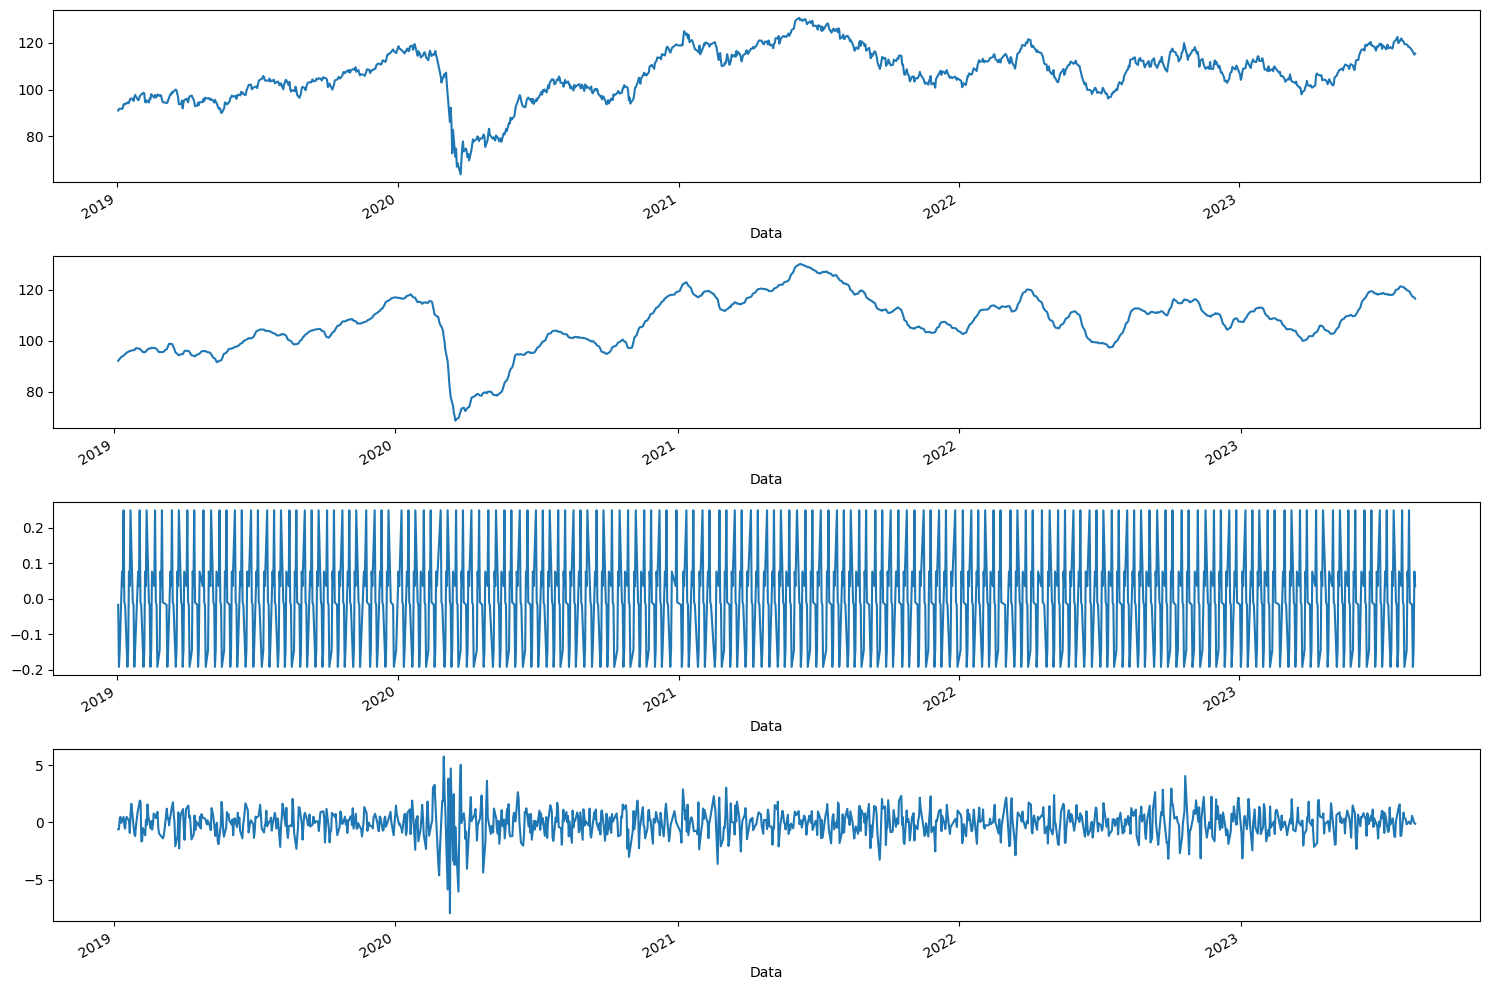

In [175]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(15,10))
dec_Vol.observed.plot(ax=ax1)
dec_Vol.trend.plot(ax=ax2)
dec_Vol.seasonal.plot(ax=ax3)
dec_Vol.resid.plot(ax=ax4)
plt.tight_layout()

In [176]:
dec_Max = seasonal_decompose(df['Maxima'], period=7)

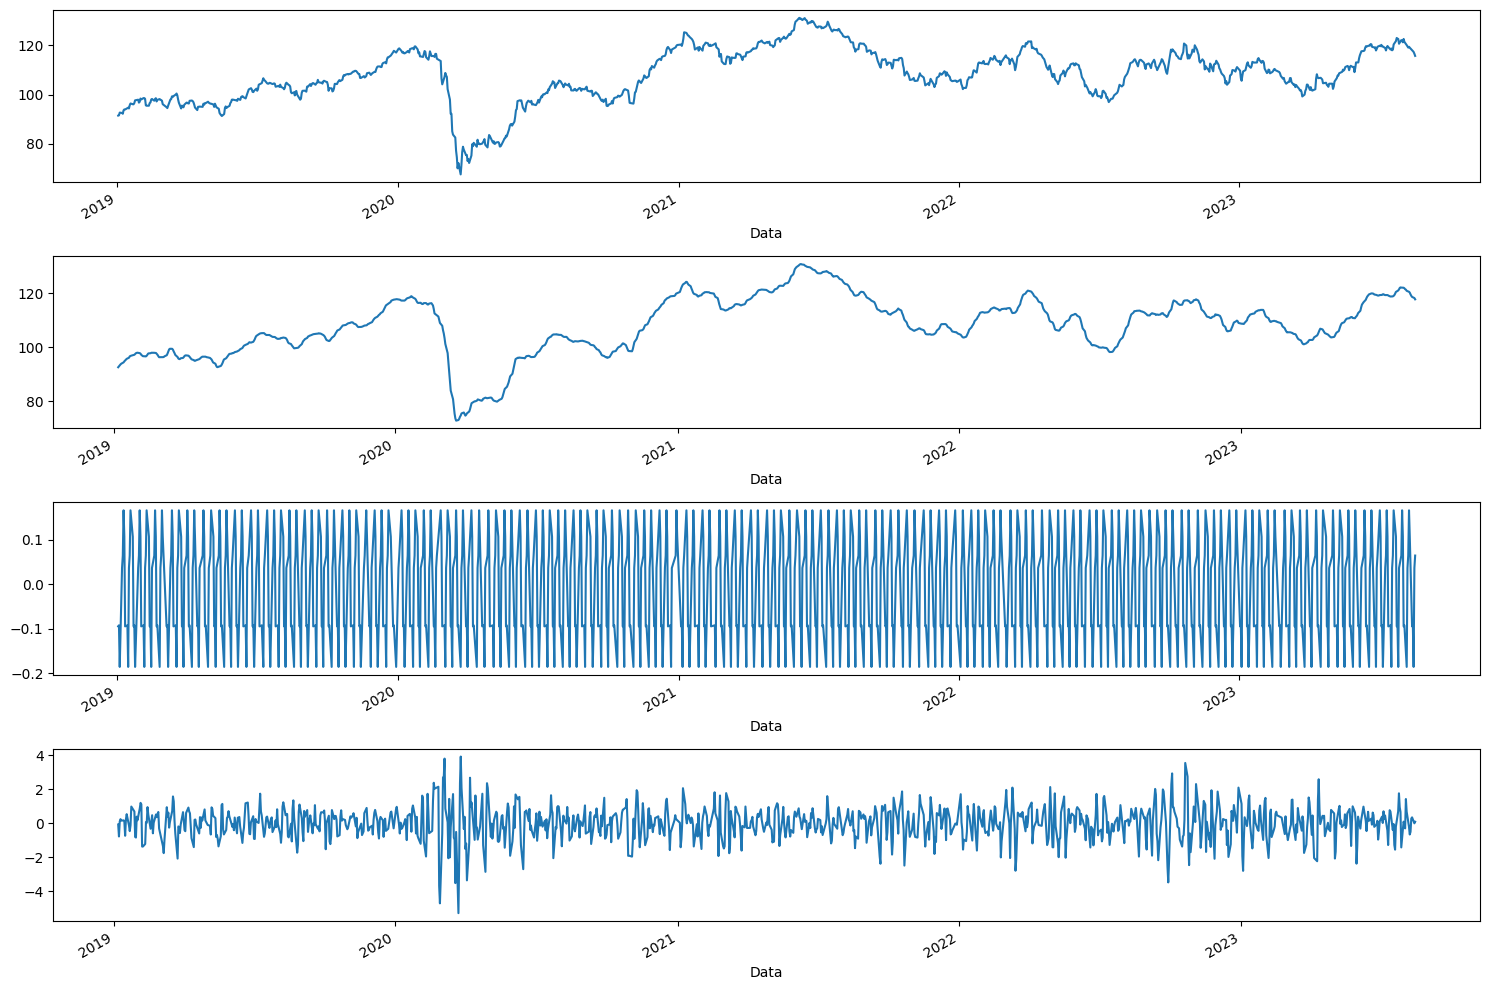

In [177]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(15,10))
dec_Max.observed.plot(ax=ax1)
dec_Max.trend.plot(ax=ax2)
dec_Max.seasonal.plot(ax=ax3)
dec_Max.resid.plot(ax=ax4)
plt.tight_layout()

#Intentificando Estacionária ou não Estacionária

## Teste ADF - (Augmented Dickey Fuller)

  H0 - Hipótese Nula (não Estacionária)
  
  H1 - Hipótese Alternativa (rejeição da hipótese nula)


p-value = 0.05 (5%) , então rejeitamos H0 com um nível de confiança de 95%

In [178]:
from statsmodels.tsa.stattools import adfuller

In [179]:
df_dickeyF=df.Fechamento.values

In [180]:
R_dickeyF = adfuller(df_dickeyF)

print("teste ABF")
print(f"Teste Estatistico: {R_dickeyF[0]}")
print(f"p-value: {R_dickeyF[1]}")
print(f"Valores Críticos: ")

for key, value in R_dickeyF[4].items():
  print(f"\t{key}: {value}")

teste ABF
Teste Estatistico: -2.9172862455433477
p-value: 0.043374453534151876
Valores Críticos: 
	1%: -3.436079050499444
	5%: -2.8640697479399972
	10%: -2.5681169015905425


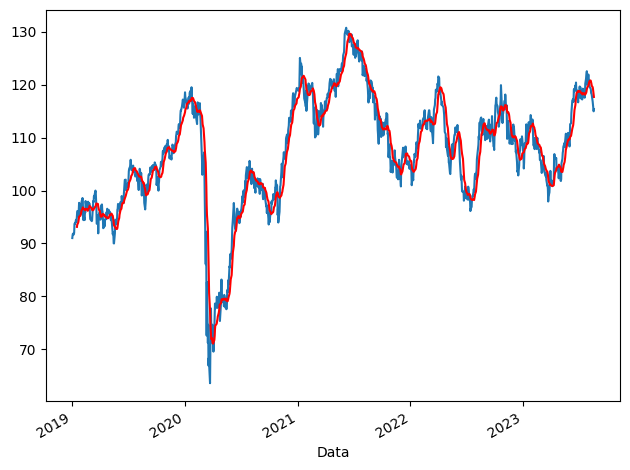

In [181]:
df_rol = df["Fechamento"].rolling(12).mean()

f, ax = plt.subplots()
df["Fechamento"].plot(ax=ax, legend=False)
df_rol.plot(ax=ax, legend=False, color="r")
plt.tight_layout()

#PROPHET - Meta --> analise de time series
https://facebook.github.io/prophet/docs/quick_start.html#python-api

In [190]:
from prophet import Prophet

In [191]:
df_prof=pd.read_csv("/content/Dados Históricos - Ibovespa_4anos.csv", sep=",")
df_prof.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,18.08.2023,115.409,114.973,115.729,114.423,"10,60M","0,37%"
1,17.08.2023,114.982,115.592,116.610,114.859,"12,75M","-0,53%"
2,16.08.2023,115.592,116.171,117.338,115.534,"18,86M","-0,50%"
3,15.08.2023,116.171,116.809,117.697,116.033,"14,64M","-0,55%"
4,14.08.2023,116.810,118.067,118.082,116.530,"11,20M","-1,06%"


In [192]:
df_prof['Data'] = df_prof['Data'].apply(converterData)

In [193]:
df_prof = df_prof[['Data', 'Último']]
df_prof

,Data,Último
0,2023-08-18,115.409
1,2023-08-17,114.982
2,2023-08-16,115.592
3,2023-08-15,116.171
4,2023-08-14,116.810
...,...,...
1148,2019-01-08,92.032
1149,2019-01-07,91.699
1150,2019-01-04,91.841
1151,2019-01-03,91.564


In [194]:
df_prof.rename(columns={'Data': 'ds', "Último":"y"}, inplace=True)
df_prof

,ds,y
0,2023-08-18,115.409
1,2023-08-17,114.982
2,2023-08-16,115.592
3,2023-08-15,116.171
4,2023-08-14,116.810
...,...,...
1148,2019-01-08,92.032
1149,2019-01-07,91.699
1150,2019-01-04,91.841
1151,2019-01-03,91.564


In [195]:
df_prof1 = Prophet()
df_prof1.fit(df_prof)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7r7xlnl8/9wj8t18m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7r7xlnl8/n2obw6ra.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28581', 'data', 'file=/tmp/tmp7r7xlnl8/9wj8t18m.json', 'init=/tmp/tmp7r7xlnl8/n2obw6ra.json', 'output', 'file=/tmp/tmp7r7xlnl8/prophet_modelcb2titkw/prophet_model-20230822235701.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:57:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:57:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [196]:
future = df_prof1.make_future_dataframe(periods=1095)
future.tail()

,ds
2243,2026-08-13
2244,2026-08-14
2245,2026-08-15
2246,2026-08-16
2247,2026-08-17


In [197]:
forecast = df_prof1.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2243,2026-08-13,136.308227,-29.756101,298.841671
2244,2026-08-14,136.262414,-28.828654,297.048116
2245,2026-08-15,134.421828,-29.976962,297.078527
2246,2026-08-16,134.344683,-33.391045,293.699562
2247,2026-08-17,135.905309,-30.204595,299.115703


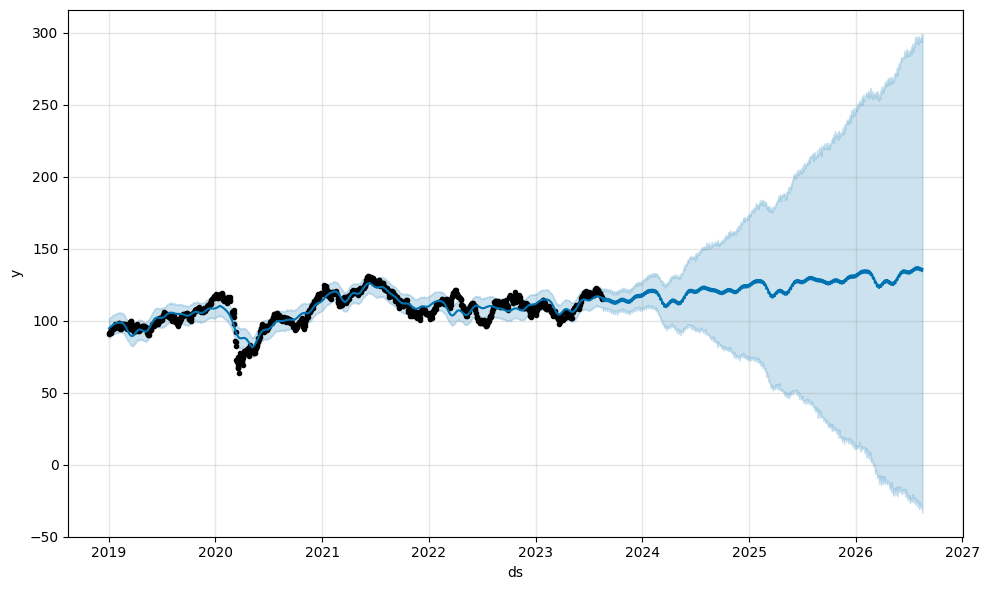

In [198]:
fig1 = df_prof1.plot(forecast)

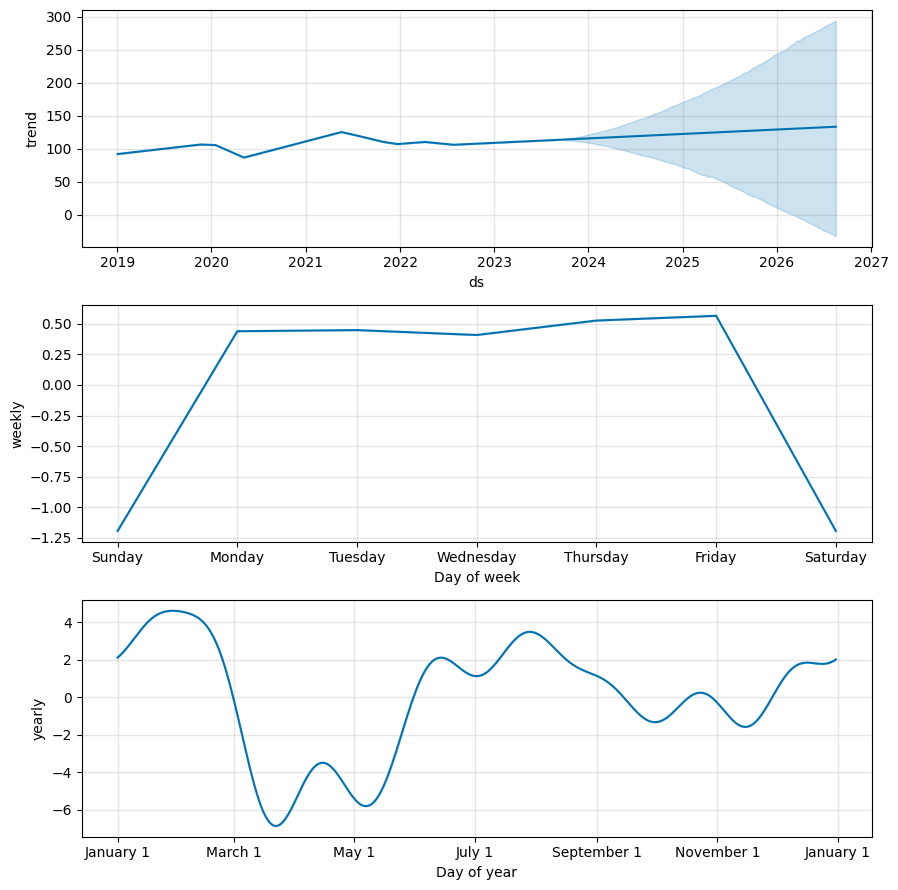

In [199]:
fig2 = df_prof1.plot_components(forecast)

In [200]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(df_prof1, forecast)

In [201]:
plot_components_plotly(df_prof1, forecast)

In [202]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

In [203]:
from prophet.diagnostics import performance_metrics
from prophet.diagnostics import cross_validation
df_cv = cross_validation(df_prof1, initial='395 days', period='180 days', horizon = '1000 days')

INFO:prophet:Making 2 forecasts with cutoffs between 2020-05-25 00:00:00 and 2020-11-21 00:00:00


  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp7r7xlnl8/cf8kgxuj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7r7xlnl8/dl87n0qu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76707', 'data', 'file=/tmp/tmp7r7xlnl8/cf8kgxuj.json', 'init=/tmp/tmp7r7xlnl8/dl87n0qu.json', 'output', 'file=/tmp/tmp7r7xlnl8/prophet_modelfae_myoc/prophet_model-20230822235823.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:58:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:58:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7r7xlnl8/nq94m4vv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7r7xlnl8/_c3mfob1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [204]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-05-26,79.821979,76.058115,83.897684,85.469,2020-05-25
1,2020-05-27,79.950329,75.548377,83.893545,87.946,2020-05-25
2,2020-05-28,80.049838,75.916213,83.755659,86.949,2020-05-25
3,2020-05-29,80.064309,76.172502,84.298335,87.403,2020-05-25
4,2020-06-01,80.155848,75.996106,84.223544,88.620,2020-05-25


In [206]:
df_p = performance_metrics(df_cv)
df_p.head(25)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,101 days,173.276614,13.163458,12.520785,0.118292,0.118854,0.126752,0.000000
1,102 days,177.330542,13.316551,12.693024,0.119799,0.120265,0.128445,0.000000
2,103 days,180.449878,13.433163,12.804165,0.120713,0.121261,0.129491,0.000000
3,104 days,184.877361,13.596961,12.943150,0.121839,0.122309,0.130799,0.000000
4,106 days,185.934592,13.635784,12.994505,0.122334,0.123019,0.131350,0.000000
5,107 days,191.286683,13.830643,13.185712,0.124085,0.124498,0.133355,0.000000
6,108 days,196.480741,14.017159,13.353608,0.125547,0.125629,0.135053,0.000000
7,109 days,202.041208,14.214120,13.508146,0.126773,0.126428,0.136514,0.000000
8,110 days,209.002358,14.456914,13.681408,0.128178,0.126428,0.138216,0.000000
9,111 days,216.044589,14.698455,13.847974,0.129541,0.126715,0.139884,0.000000


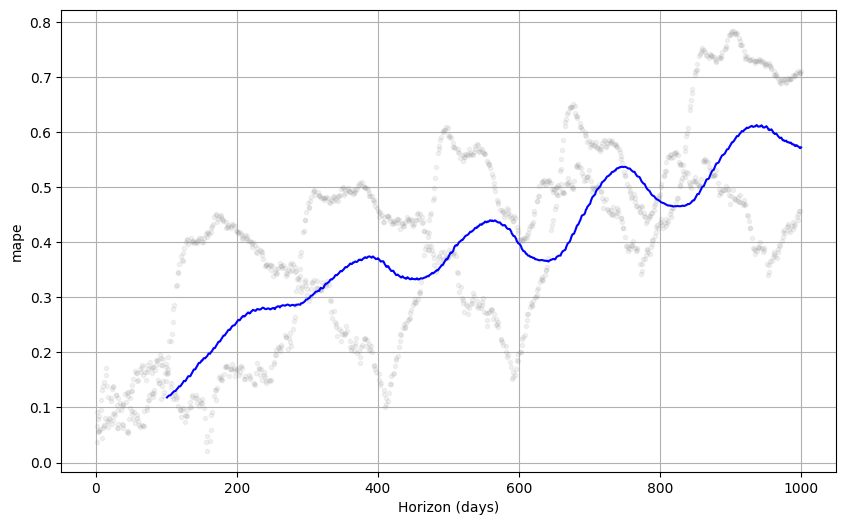

In [207]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

In [ ]:
def mape(ytrue,ypred): # erro médio percentual absoluto
    ytrue = ytrue.values
    ypred = ypred.values
    return np.mean(nb.abs((ytrue - ypred)/ ytrue))

#Forecasting

In [208]:
df_1=pd.read_csv("/content/Dados Históricos - Ibovespa_4anos.csv", sep=",")
df_1.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,18.08.2023,115.409,114.973,115.729,114.423,"10,60M","0,37%"
1,17.08.2023,114.982,115.592,116.610,114.859,"12,75M","-0,53%"
2,16.08.2023,115.592,116.171,117.338,115.534,"18,86M","-0,50%"
3,15.08.2023,116.171,116.809,117.697,116.033,"14,64M","-0,55%"
4,14.08.2023,116.810,118.067,118.082,116.530,"11,20M","-1,06%"


In [209]:
def convert_to_float(value):
    if "M" in value:
        return float(value.replace("M", "").replace(",", ".")) * 10000
    elif "K" in value:
        return float(value.replace("K", "").replace(",", ".")) * 10
    else:
        return float(value.replace(",", "."))

df_1["Vol."] = df_1["Vol."].apply(convert_to_float)

print(df_1)

            Data   Último  Abertura   Máxima   Mínima      Vol.    Var%
0     18.08.2023  115.409   114.973  115.729  114.423  106000.0   0,37%
1     17.08.2023  114.982   115.592  116.610  114.859  127500.0  -0,53%
2     16.08.2023  115.592   116.171  117.338  115.534  188600.0  -0,50%
3     15.08.2023  116.171   116.809  117.697  116.033  146400.0  -0,55%
4     14.08.2023  116.810   118.067  118.082  116.530  112000.0  -1,06%
...          ...      ...       ...      ...      ...       ...     ...
1148  08.01.2019   92.032    91.699   92.231   91.064   46400.0   0,36%
1149  07.01.2019   91.699    91.845   92.552   91.288   47100.0  -0,15%
1150  04.01.2019   91.841    91.577   92.701   90.824   54900.0   0,30%
1151  03.01.2019   91.564    91.011   91.596   89.922   62500.0   0,61%
1152  02.01.2019   91.012    87.887   91.479   87.536   57900.0   3,56%

[1153 rows x 7 columns]


In [210]:
df_1['Data'] = df_1['Data'].apply(converterData)

In [211]:
df_1.describe()

,Último,Abertura,Máxima,Mínima,Vol.
count,1153.000000,1153.000000,1153.000000,1153.000000,1153.000000
mean,107.048034,107.024967,108.057820,105.992696,98292.145013
std,10.954091,10.965904,10.771892,11.106725,38238.770484
min,63.570000,63.604000,67.604000,61.691000,4243.200000
25%,100.553000,100.553000,101.560000,99.630000,68000.000000
50%,107.629000,107.582000,108.602000,106.624000,99900.000000
75%,115.121000,115.093000,115.863000,113.945000,123200.000000
max,130.776000,130.776000,131.190000,129.526000,260300.000000


In [212]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1153 entries, 0 to 1152
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Data      1153 non-null   datetime64[ns]
 1   Último    1153 non-null   float64       
 2   Abertura  1153 non-null   float64       
 3   Máxima    1153 non-null   float64       
 4   Mínima    1153 non-null   float64       
 5   Vol.      1153 non-null   float64       
 6   Var%      1153 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 63.2+ KB


In [213]:
df_1.rename(columns={"Vol.": "Volume"}, inplace=True)

In [215]:
df_1.head()

,Data,Último,Abertura,Máxima,Mínima,Volume,Var%
0,2023-08-18,115.409,114.973,115.729,114.423,106000.0,"0,37%"
1,2023-08-17,114.982,115.592,116.610,114.859,127500.0,"-0,53%"
2,2023-08-16,115.592,116.171,117.338,115.534,188600.0,"-0,50%"
3,2023-08-15,116.171,116.809,117.697,116.033,146400.0,"-0,55%"
4,2023-08-14,116.810,118.067,118.082,116.530,112000.0,"-1,06%"


In [216]:
df_1 = df_1[["Data", "Último"]]
df_1 = df_1.rename(columns={"Data": "ds", "Último": "y"})

In [217]:
df_1

,ds,y
0,2023-08-18,115.409
1,2023-08-17,114.982
2,2023-08-16,115.592
3,2023-08-15,116.171
4,2023-08-14,116.810
...,...,...
1148,2019-01-08,92.032
1149,2019-01-07,91.699
1150,2019-01-04,91.841
1151,2019-01-03,91.564


In [221]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1153 entries, 0 to 1152
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1153 non-null   datetime64[ns]
 1   y       1153 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 18.1 KB


In [222]:
!pip install statsforecast

In [223]:
df_1.tail()

,ds,y
1148,2019-01-08,92.032
1149,2019-01-07,91.699
1150,2019-01-04,91.841
1151,2019-01-03,91.564
1152,2019-01-02,91.012


In [230]:
df_1["unique_id"] = "Ibovespa"

In [231]:
df_1.head()

,ds,y,unique_id
0,2023-08-18,115.409,Ibovespa
1,2023-08-17,114.982,Ibovespa
2,2023-08-16,115.592,Ibovespa
3,2023-08-15,116.171,Ibovespa
4,2023-08-14,116.810,Ibovespa


In [232]:
treino = df_1.loc[df_1["ds"]<"2022-10-01"]
valid = df_1.loc[(df_1["ds"]>="2022-10-01")&(df_1["ds"]<"2023-02-18")]
h = valid["ds"].nunique() #validação do período "valid" (3meses)

In [233]:
treino.head()

,ds,y,unique_id
220,2022-09-30,110.037,Ibovespa
221,2022-09-29,107.664,Ibovespa
222,2022-09-28,108.451,Ibovespa
223,2022-09-27,108.376,Ibovespa
224,2022-09-26,109.114,Ibovespa


In [234]:
h

96

In [235]:
def wmape(y_true, y_pred):
  return np.abs(y_true-y_pred).sum()/np.abs(y_true).sum()

In [236]:
from statsforecast import StatsForecast
from statsforecast.models import Naive, SeasonalNaive, SeasonalWindowAverage, AutoARIMA

WMAPE: nan%


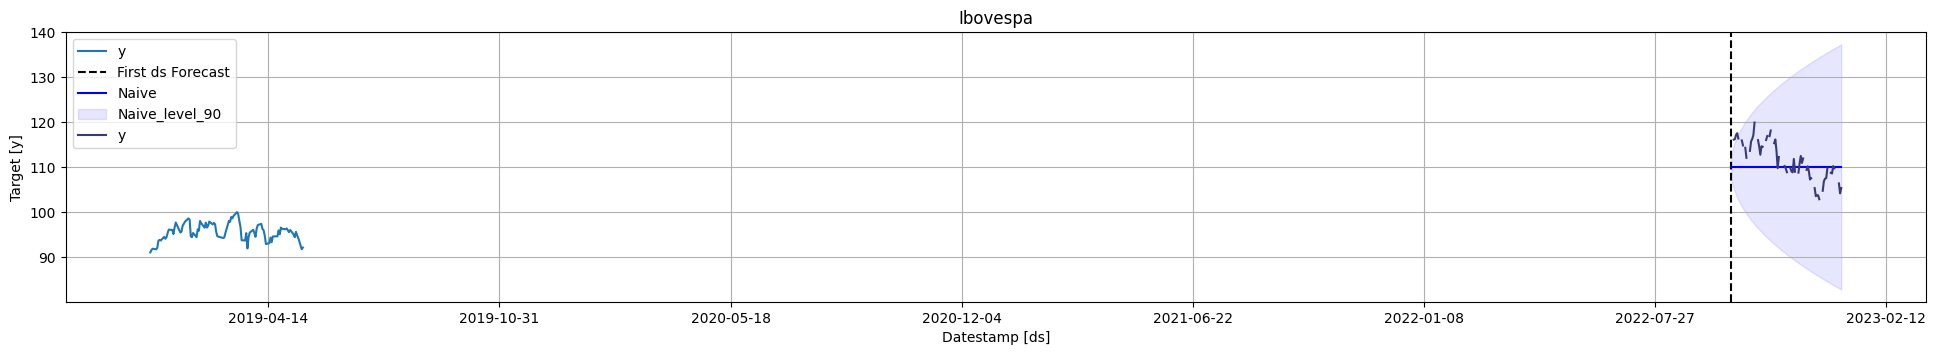

In [241]:
model = StatsForecast(models=[Naive()], freq="D", n_jobs=-1)
model.fit(treino)

forecast_df = model.predict(h=h, level=[90])
forecast_df = forecast_df.reset_index().merge(valid, on=["ds", "unique_id"], how="left")

wmape1 = wmape(forecast_df["y"].values, forecast_df["Naive"].values)
print(f"WMAPE: {wmape1:.2%}")

model.plot(treino, forecast_df, level=[90], unique_ids=["Ibovespa"], engine="matplotlib", max_insample_length=90)

In [240]:
forecast_df.head(25)

,unique_id_x,ds,Naive,Naive-lo-96,Naive-hi-96,y,unique_id_y
0,Ibovespa,2022-10-01,110.037003,106.561836,113.512169,NaN,NaN
1,Ibovespa,2022-10-02,110.037003,105.122375,114.951630,NaN,NaN
2,Ibovespa,2022-10-03,110.037003,104.017838,116.056168,116.134,Ibovespa
3,Ibovespa,2022-10-04,110.037003,103.086670,116.987335,116.230,Ibovespa
4,Ibovespa,2022-10-05,110.037003,102.266296,117.807709,117.198,Ibovespa
5,Ibovespa,2022-10-06,110.037003,101.524620,118.549385,117.561,Ibovespa
6,Ibovespa,2022-10-07,110.037003,100.842583,119.231422,116.375,Ibovespa
7,Ibovespa,2022-10-08,110.037003,100.207756,119.866249,NaN,NaN
8,Ibovespa,2022-10-09,110.037003,99.611511,120.462494,NaN,NaN
9,Ibovespa,2022-10-10,110.037003,99.047569,121.026436,115.941,Ibovespa


#Scikt learn.

In [242]:
df.head()

,Fechamento,Abertura,Maxima,Minima,Vol,Var
Data,,,,,,
2019-01-02,91.012,87.887,91.479,87.536,5790000.0,3.56
2019-01-03,91.564,91.011,91.596,89.922,6250000.0,0.61
2019-01-04,91.841,91.577,92.701,90.824,5490000.0,0.30
2019-01-07,91.699,91.845,92.552,91.288,4710000.0,-0.15
2019-01-08,92.032,91.699,92.231,91.064,4640000.0,0.36


In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1153 entries, 2019-01-02 to 2023-08-18
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Fechamento  1153 non-null   float64
 1   Abertura    1153 non-null   float64
 2   Maxima      1153 non-null   float64
 3   Minima      1153 non-null   float64
 4   Vol         1153 non-null   float64
 5   Var         1153 non-null   float64
dtypes: float64(6)
memory usage: 63.1 KB


In [244]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [245]:
X = df.drop(columns=['Fechamento'])
y = df['Fechamento']

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Realizar previsões no conjunto de teste
y_pred = modelo.predict(X_test)

# Avaliar a acurácia do modelo usando o coeficiente de determinação (R²)
acuracia = r2_score(y_test, y_pred)
print("Acurácia do Modelo (R²):", acuracia)

Acurácia do Modelo (R²): 0.9993643947067924


#stats Model

In [246]:
import pandas as pd
import statsmodels.api as sm

In [247]:
X = df.drop(columns=['Fechamento'])
y = df['Fechamento']

# Adicionar uma coluna de constante aos atributos (intercepto)
X = sm.add_constant(X)

# Dividir os dados em conjunto de treinamento e teste (opcional, depende do caso)
# Aqui você pode usar a mesma abordagem de divisão de dados que mencionamos anteriormente

# Criar o modelo de regressão
modelo = sm.OLS(y, X).fit()

# Obter as previsões do modelo
y_pred = modelo.predict(X)

# Calcular a acurácia (coeficiente de determinação R²)
acuracia = modelo.rsquared
print("Acurácia do Modelo (R²):", acuracia)

Acurácia do Modelo (R²): 0.9994118360282903


#prophet

In [248]:
import pandas as pd
from prophet import Prophet
from prophet.diagnostics import performance_metrics

In [249]:
df_1.head()

,ds,y,unique_id
0,2023-08-18,115.409,Ibovespa
1,2023-08-17,114.982,Ibovespa
2,2023-08-16,115.592,Ibovespa
3,2023-08-15,116.171,Ibovespa
4,2023-08-14,116.810,Ibovespa


In [250]:
df_1 = df_1.drop(columns=['unique_id'])

In [251]:
df_1

,ds,y
0,2023-08-18,115.409
1,2023-08-17,114.982
2,2023-08-16,115.592
3,2023-08-15,116.171
4,2023-08-14,116.810
...,...,...
1148,2019-01-08,92.032
1149,2019-01-07,91.699
1150,2019-01-04,91.841
1151,2019-01-03,91.564


In [252]:
df_1['ds'] = pd.to_datetime(df_1['ds'])

In [253]:
df_1.head()

,ds,y
0,2023-08-18,115.409
1,2023-08-17,114.982
2,2023-08-16,115.592
3,2023-08-15,116.171
4,2023-08-14,116.810


,ds,y
0,2023-08-18,115.409
1,2023-08-17,114.982
2,2023-08-16,115.592
3,2023-08-15,116.171
4,2023-08-14,116.810


In [255]:
!pip install --upgrade prophet

In [256]:
from prophet import Prophet

In [257]:
df_2 = Prophet()
df_2.fit(df_1)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7r7xlnl8/jjrkocdb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7r7xlnl8/5szbdlkb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92418', 'data', 'file=/tmp/tmp7r7xlnl8/jjrkocdb.json', 'init=/tmp/tmp7r7xlnl8/5szbdlkb.json', 'output', 'file=/tmp/tmp7r7xlnl8/prophet_modeluscd0yxa/prophet_model-20230823003113.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:31:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:31:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [258]:
future = df_2.make_future_dataframe(periods=1095)
future.tail()

,ds
2243,2026-08-13
2244,2026-08-14
2245,2026-08-15
2246,2026-08-16
2247,2026-08-17


In [259]:
forecast = df_2.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2243,2026-08-13,136.308227,-41.378523,290.639026
2244,2026-08-14,136.262414,-34.225411,291.828406
2245,2026-08-15,134.421828,-38.758082,292.052266
2246,2026-08-16,134.344683,-40.401318,289.948326
2247,2026-08-17,135.905309,-37.274177,292.923137


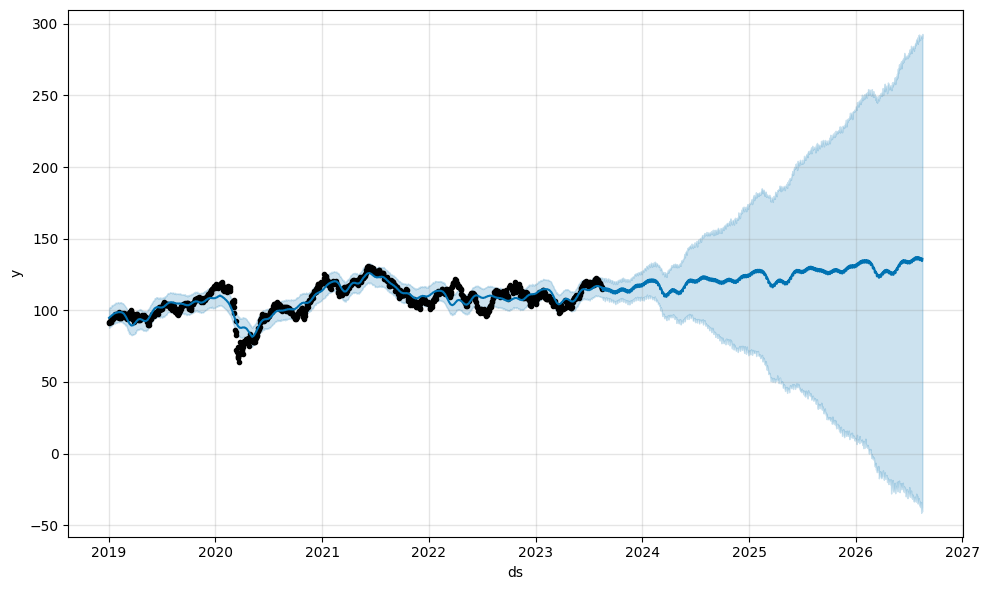

In [260]:
fig1 = df_2.plot(forecast)

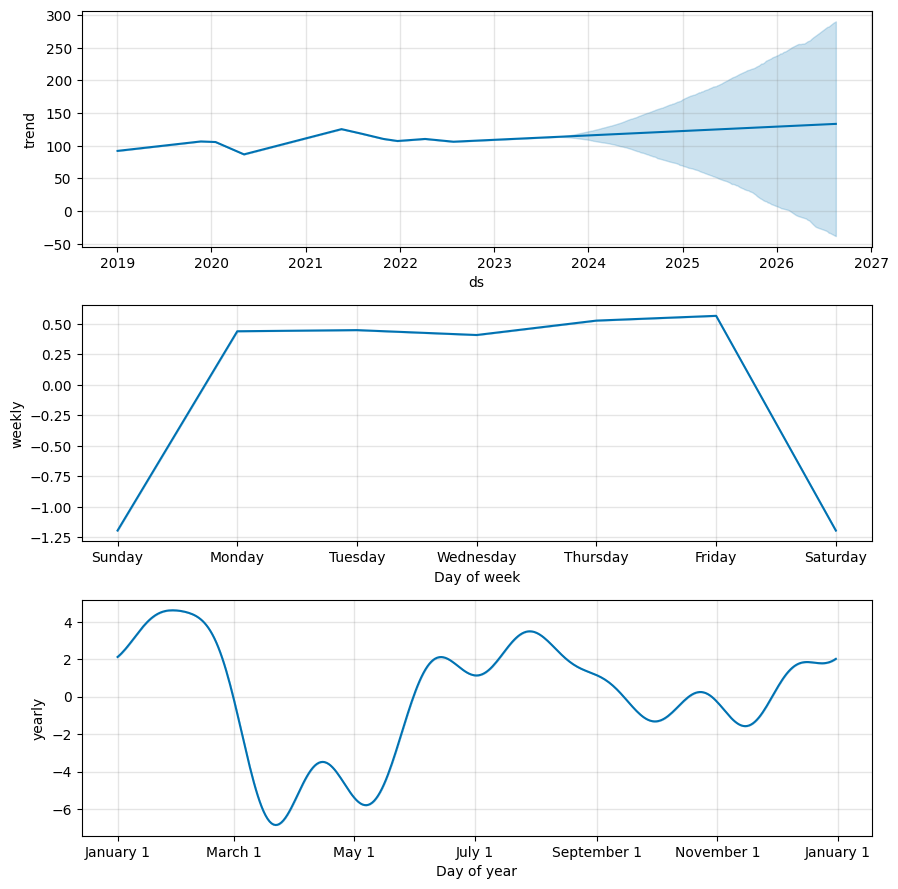

In [261]:
fig2 = df_2.plot_components(forecast)


In [262]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(df_2, forecast)

In [263]:
df_cv = cross_validation(df_2, initial='395 days', period='180 days', horizon = '1000 days')

INFO:prophet:Making 2 forecasts with cutoffs between 2020-05-25 00:00:00 and 2020-11-21 00:00:00


  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp7r7xlnl8/vhuy2ovz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7r7xlnl8/vup286te.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80', 'data', 'file=/tmp/tmp7r7xlnl8/vhuy2ovz.json', 'init=/tmp/tmp7r7xlnl8/vup286te.json', 'output', 'file=/tmp/tmp7r7xlnl8/prophet_modelvsx6_f6y/prophet_model-20230823003133.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:31:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:31:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7r7xlnl8/76w91evf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7r7xlnl8/sqle_568.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib

In [264]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-05-26,79.821979,75.816580,83.750036,85.469,2020-05-25
1,2020-05-27,79.950329,75.997955,83.831019,87.946,2020-05-25
2,2020-05-28,80.049838,76.053410,84.187270,86.949,2020-05-25
3,2020-05-29,80.064309,75.794493,84.102904,87.403,2020-05-25
4,2020-06-01,80.155848,75.809399,84.501118,88.620,2020-05-25
...,...,...,...,...,...,...
1360,2023-08-14,33.767469,-210.632315,270.137754,116.810,2020-11-21
1361,2023-08-15,33.888161,-210.302441,272.327829,116.171,2020-11-21
1362,2023-08-16,33.753427,-211.822221,272.717698,115.592,2020-11-21
1363,2023-08-17,33.563780,-210.176863,271.948771,114.982,2020-11-21


In [265]:
# Criar um DataFrame de datas para as quais você deseja fazer previsões
futuro = df_2.make_future_dataframe(periods=30)  # Exemplo: 30 dias no futuro

# Fazer as previsões
previsoes = future.predict(futuro)

# Avaliar a qualidade das previsões usando MAPE
metricas = performance_metrics(previsoes)
mape = metricas['mape'].mean()  # Valor médio do MAPE

print("Média do MAPE:", mape)

AttributeError: ignored

In [ ]:
df

#Arima

In [94]:
from statsmodels.tsa.arima.model import ARIMA

# Ajustar modelo ARIMA
modelo_arima = ARIMA(df['Fechamento'], order=(p, d, q))
resultado = modelo_arima.fit()

# Fazer previsões
previsoes_arima = resultado.predict(start=len(df), end=len(df) + n-1, typ='levels')

NameError: ignored